# DETECTING PSYCHOLOGICAL STATE OF CHILDREN BY HTP DRAWINGS

In [1]:
import os
import pandas as pd
import fitz 
from PIL import Image

import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
dataset_folder = 'HTPDataset'

In [3]:
pdf_files = [f for f in os.listdir(dataset_folder) if f.endswith('.pdf')]
print("List of PDF files:")
for pdf_file in pdf_files:
    print(pdf_file)

List of PDF files:
201802_MBC.pdf
522019_GY.pdf
202016_NEŞ.pdf
201720_ERD.pdf
142019_BST.pdf
201664_MMŞ.pdf
152017_MBT.pdf
532019_MT.pdf
302016_YG.pdf
992016_OFB.pdf
992017_EK.pdf
222016_KAM.pdf
402016_NG.pdf
212016_MG.pdf
162019_EA.pdf
562019_YD.pdf
242016_ZK.pdf
262016_BGÖ.pdf
552017_KYA.pdf
122018_AST.pdf
201755_GA.pdf
582019_ZD.pdf
132018_BMY.pdf
142018_CEÜ.pdf
582017_RZİ.pdf
201759_BK.pdf
512018_FZA.pdf
201803_SD.pdf
162017_MK.pdf
192019_ES.pdf
542018_RRA.pdf
201839_MŞY.pdf
192016_ENÇ.pdf
112018_AG.pdf
132019_BA.pdf
162016_EMA.pdf
122019_AAA.pdf
172016_AK.pdf
562017_LÇ.pdf
532017_FŞK.pdf
592019_MB.pdf
112016_YG.pdf
252016_EDB.pdf
172019_EB.pdf
201809_OMB.pdf
222019_ATS.pdf
152019_CEÖ.pdf
122017_DF.pdf
182019_EHT.pdf
152016_HBK.pdf
282016_OMB.pdf
512019_FAG.pdf
201815_EBK.pdf
412016_Nİ.pdf
232019_BBG.pdf
472019_ZAA.pdf
992018_ENŞ.pdf
102016_EY.pdf
552019_RE.pdf
312016_AB.pdf
162018_EA.pdf
201738_AŞ.pdf
982018_YEK.pdf
522018_HP.pdf
142017_EM.pdf
542019_MÖ.pdf
532018_HC

In [4]:
pdf_page_counts = {}
for pdf_file in pdf_files:
    pdf_path = os.path.join(dataset_folder, pdf_file)
    pdf_document = fitz.open(pdf_path)
    num_pages = pdf_document.page_count
    pdf_page_counts[pdf_file] = num_pages
    pdf_document.close()
print("Number of pages in each PDF file:")
for pdf_file, num_pages in pdf_page_counts.items():
    print(f"{pdf_file}: {num_pages} pages")

Number of pages in each PDF file:
201802_MBC.pdf: 5 pages
522019_GY.pdf: 5 pages
202016_NEŞ.pdf: 5 pages
201720_ERD.pdf: 5 pages
142019_BST.pdf: 5 pages
201664_MMŞ.pdf: 10 pages
152017_MBT.pdf: 10 pages
532019_MT.pdf: 5 pages
302016_YG.pdf: 4 pages
992016_OFB.pdf: 4 pages
992017_EK.pdf: 6 pages
222016_KAM.pdf: 5 pages
402016_NG.pdf: 5 pages
212016_MG.pdf: 5 pages
162019_EA.pdf: 5 pages
562019_YD.pdf: 5 pages
242016_ZK.pdf: 5 pages
262016_BGÖ.pdf: 5 pages
552017_KYA.pdf: 3 pages
122018_AST.pdf: 5 pages
201755_GA.pdf: 7 pages
582019_ZD.pdf: 5 pages
132018_BMY.pdf: 5 pages
142018_CEÜ.pdf: 5 pages
582017_RZİ.pdf: 5 pages
201759_BK.pdf: 5 pages
512018_FZA.pdf: 5 pages
201803_SD.pdf: 5 pages
162017_MK.pdf: 8 pages
192019_ES.pdf: 5 pages
542018_RRA.pdf: 5 pages
201839_MŞY.pdf: 6 pages
192016_ENÇ.pdf: 5 pages
112018_AG.pdf: 5 pages
132019_BA.pdf: 5 pages
162016_EMA.pdf: 5 pages
122019_AAA.pdf: 5 pages
172016_AK.pdf: 5 pages
562017_LÇ.pdf: 4 pages
532017_FŞK.pdf: 5 pages
592019_MB.pdf:

In [5]:
img_dataset = 'HTPImages'
if not os.path.exists(img_dataset):
    os.makedirs(img_dataset)

In [6]:
pdf_files = [f for f in os.listdir(dataset_folder) if f.endswith('.pdf')]

for pdf_file in pdf_files:
    pdf_path = os.path.join(dataset_folder, pdf_file)
    pdf_document = fitz.open(pdf_path)
    
    base_name = os.path.splitext(pdf_file)[0]
    
    for page_num in range(pdf_document.page_count):
        page = pdf_document.load_page(page_num)
        pix = page.get_pixmap()
        
        img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
        img_filename = f"{base_name}_{page_num + 1}.jpg"
        img_path = os.path.join(img_dataset, img_filename)
        img.save(img_path, "JPEG")
    
    pdf_document.close()

print("PDF to image conversion completed.")

PDF to image conversion completed.


In [7]:
def extract_metadata(filename):
    parts = os.path.splitext(filename)[0].split('_')
    id = parts[0]
    patient_name = '_'.join(parts[1:-1])
    page_number = parts[-1]
    return id, patient_name, page_number

image_files = [f for f in os.listdir(img_dataset) if f.endswith('.jpg')]

In [8]:
'''
num_samples = 5
fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

for i in range(num_samples):
    img_filename = image_files[i]
    img_path = os.path.join(img_dataset, img_filename)
    img = Image.open(img_path)
    
    id, patient_name, page_number = extract_metadata(img_filename)
    
    axes[i].imshow(img)
    axes[i].set_title(f"ID: {id}\nPatient Name: {patient_name}\nPage Number: {page_number}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()
'''

'\nnum_samples = 5\nfig, axes = plt.subplots(1, num_samples, figsize=(15, 5))\n\nfor i in range(num_samples):\n    img_filename = image_files[i]\n    img_path = os.path.join(img_dataset, img_filename)\n    img = Image.open(img_path)\n    \n    id, patient_name, page_number = extract_metadata(img_filename)\n    \n    axes[i].imshow(img)\n    axes[i].set_title(f"ID: {id}\nPatient Name: {patient_name}\nPage Number: {page_number}")\n    axes[i].axis(\'off\')\n\nplt.tight_layout()\nplt.show()\n'

In [9]:
ids = []
patient_names = []
page_numbers = []
patient_ids = []

for img_filename in image_files:
    id, patient_name, page_number = extract_metadata(img_filename)
    ids.append(id)
    patient_names.append(patient_name)
    page_numbers.append(page_number)
    patient_ids.append(f"{id}_{patient_name}")

df = pd.DataFrame({
    'image_file': image_files, 
    'ID': ids,
    'patient_name': patient_names,
    'page_number': page_numbers,
    'patient_Identifier': patient_ids
})

unique_patient_ids = {identifier: idx+1 for idx, identifier in enumerate(sorted(set(patient_ids)))}
df['patient_ID'] = df['patient_Identifier'].map(unique_patient_ids)
df = df.drop(columns=['patient_Identifier'])

df

,image_file,ID,patient_name,page_number,patient_ID
0,992016_OFB_1.jpg,992016,OFB,1,81
1,512017_ES_3.jpg,512017,ES,3,61
2,201931_REG_2.jpg,201931,REG,2,44
3,122019_AAA_1.jpg,122019,AAA,1,8
4,202016_NEŞ_1.jpg,202016,NEŞ,1,45
...,...,...,...,...,...
445,201759_BK_3.jpg,201759,BK,3,35
446,512020_ARÖ_4.jpg,512020,ARÖ,4,64
447,522018_HP_5.jpg,522018,HP,5,65
448,112016_YG_5.jpg,112016,YG,5,2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   image_file    450 non-null    object
 1   ID            450 non-null    object
 2   patient_name  450 non-null    object
 3   page_number   450 non-null    object
 4   patient_ID    450 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 17.7+ KB


In [11]:
for img_filename in image_files:
    old_path = os.path.join(img_dataset, img_filename)
    id, patient_name, page_number = extract_metadata(img_filename)
    new_filename = f"{df[df['image_file'] == img_filename]['patient_ID'].iloc[0]}_{page_number}.jpg"
    new_path = os.path.join(img_dataset, new_filename)
    os.rename(old_path, new_path)
    df.loc[df['image_file'] == img_filename, 'image_file'] = new_filename

df

,image_file,ID,patient_name,page_number,patient_ID
0,81_1.jpg,992016,OFB,1,81
1,61_3.jpg,512017,ES,3,61
2,44_2.jpg,201931,REG,2,44
3,8_1.jpg,122019,AAA,1,8
4,45_1.jpg,202016,NEŞ,1,45
...,...,...,...,...,...
445,35_3.jpg,201759,BK,3,35
446,64_4.jpg,512020,ARÖ,4,64
447,65_5.jpg,522018,HP,5,65
448,2_5.jpg,112016,YG,5,2


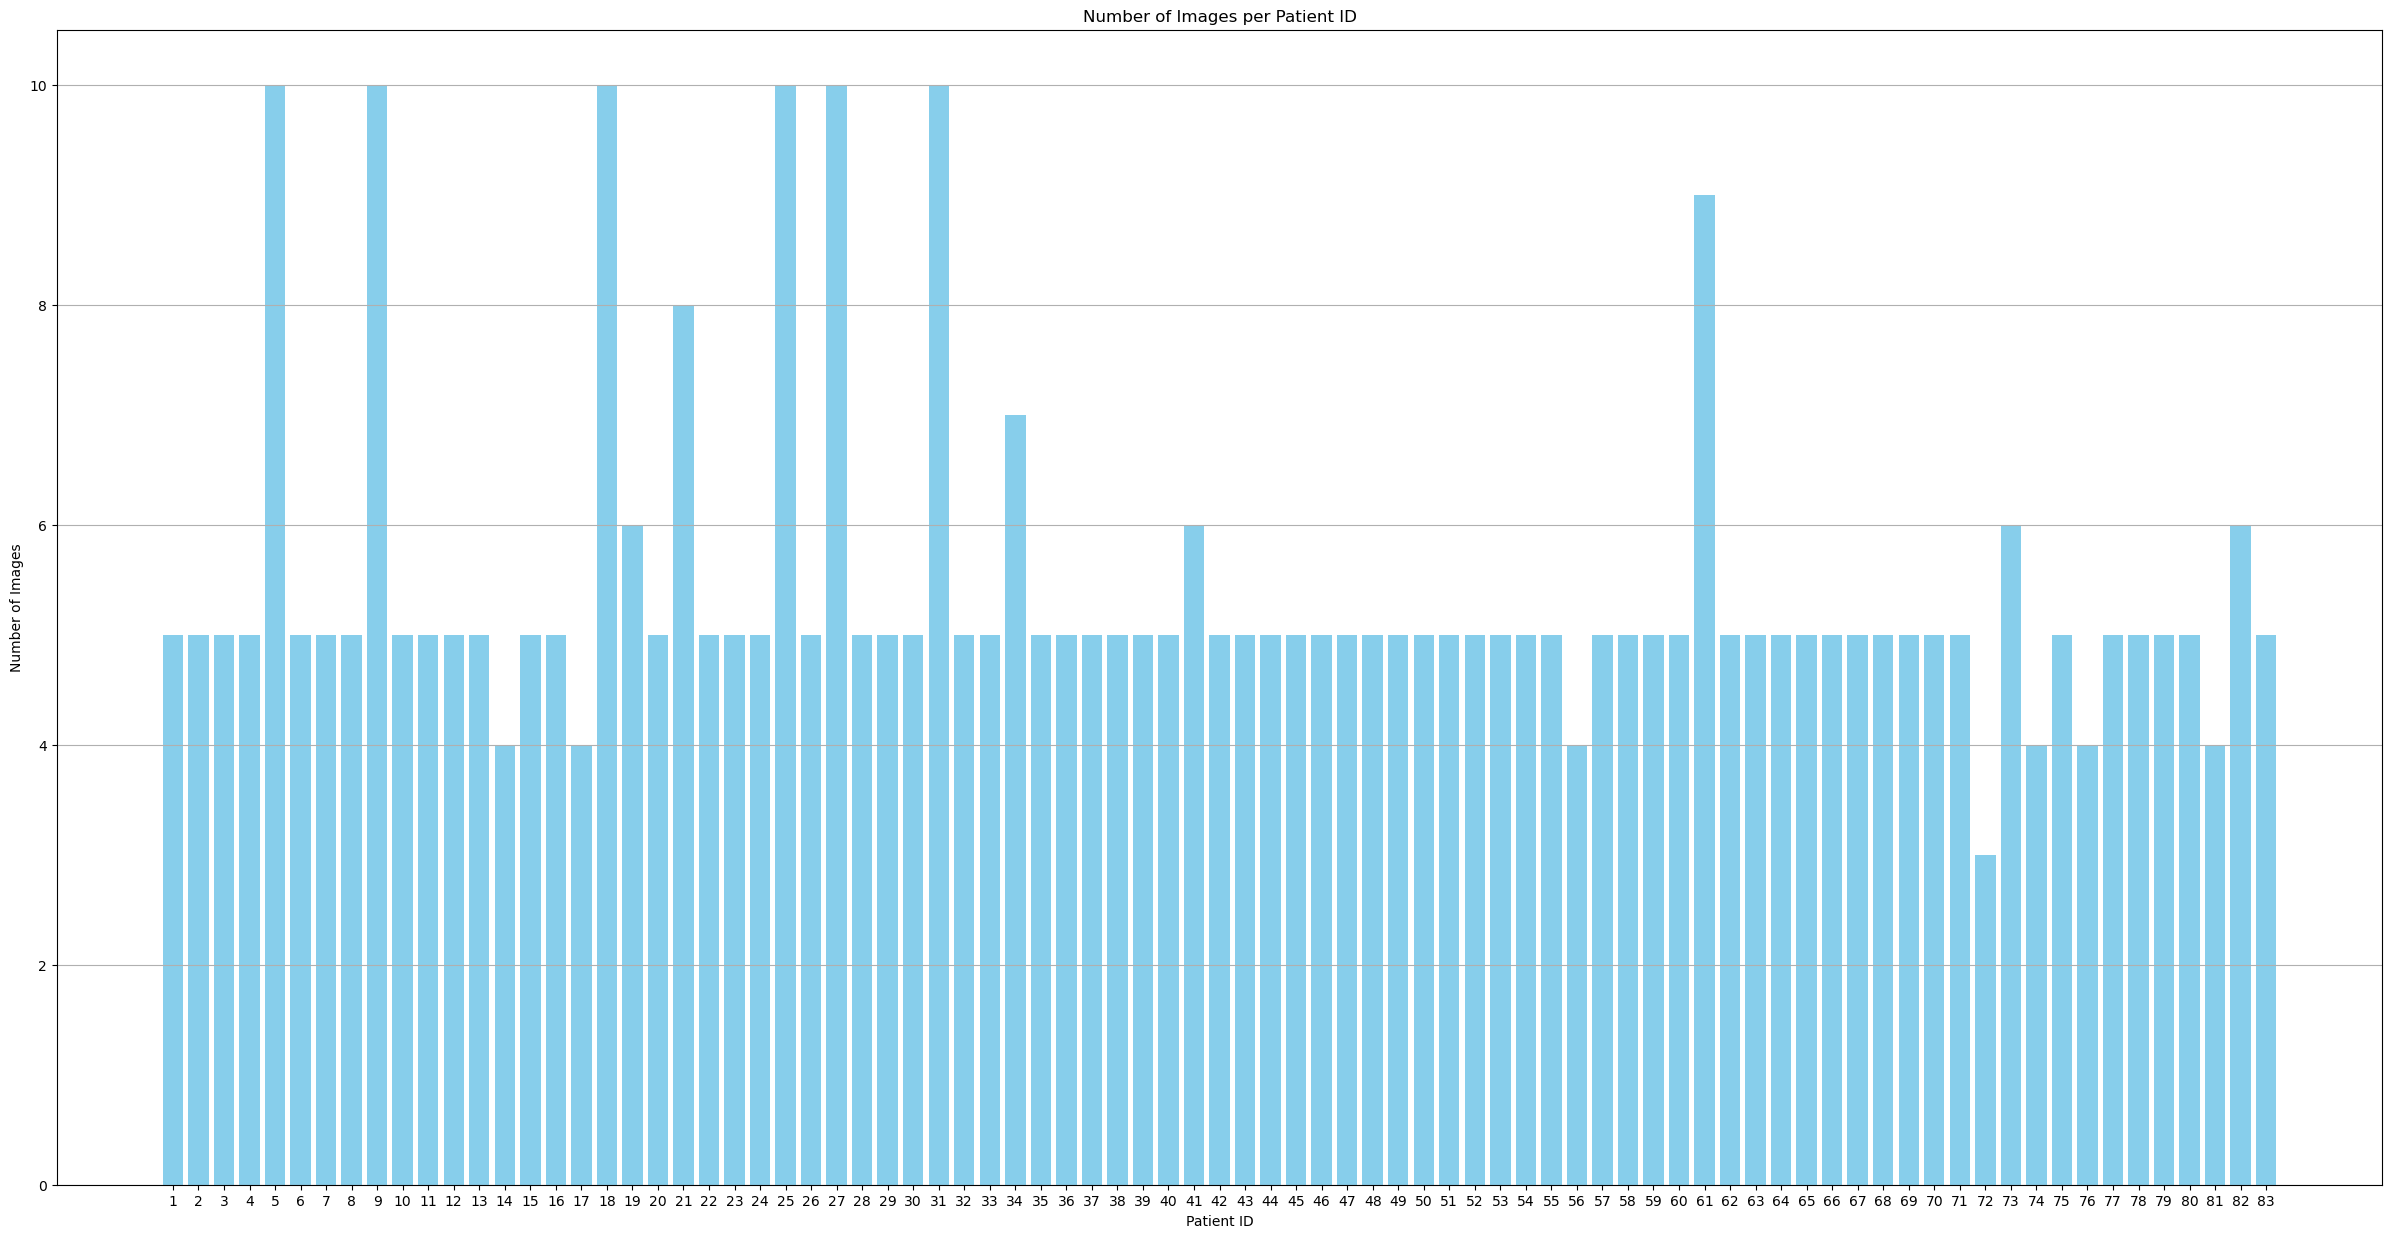

In [12]:
image_counts = df['patient_ID'].value_counts().sort_index()

plt.figure(figsize=(30, 15))
plt.bar(image_counts.index, image_counts.values, color='skyblue')
plt.xlabel('Patient ID')
plt.ylabel('Number of Images')
plt.title('Number of Images per Patient ID')
plt.xticks(image_counts.index)
plt.grid(axis='y')
plt.show()

In [13]:
xlsx_path = 'HTPDataset/patient_info.xlsx'
df_excel = pd.read_excel(xlsx_path)
df_excel.head()

,ID,Initials,Gen,Age,CB_Ex_R,CB_Anx_R,CB_Dep_R,WISC_TOZP_SP,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,102016,EY,1,7,12.0,4.0,5.0,90.0,NaN,NaN,We consider only children with IQ equal or abo...
1,112016,YG,0,9,3.0,5.0,3.0,NaN,NaN,NaN,We consider only school age children: 6-12 yea...
2,112018,AG,1,8,4.0,8.0,7.0,62.0,Low IQ: ignore the child,NaN,NaN
3,112019,AA,1,11,10.0,3.0,1.0,88.0,NaN,NaN,NaN
4,122016,TO,0,8,6.0,3.0,6.0,136.0,NaN,NaN,NaN


In [14]:
df_excel = df_excel.drop(columns=['Initials','Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'])
df_excel = df_excel.rename(columns={'Gen': 'sex', 'Age': 'age', 'CB_Ex_R': 'externalising_score', 'CB_Anx_R':'anxious_score', 'CB_Dep_R':'depressive_score', 'WISC_TOZP_SP':'iq_score'})
df_excel

,ID,sex,age,externalising_score,anxious_score,depressive_score,iq_score
0,102016,1,7,12.0,4.0,5.0,90.0
1,112016,0,9,3.0,5.0,3.0,NaN
2,112018,1,8,4.0,8.0,7.0,62.0
3,112019,1,11,10.0,3.0,1.0,88.0
4,122016,0,8,6.0,3.0,6.0,136.0
...,...,...,...,...,...,...,...
79,982018,1,6,9.0,8.0,5.0,85.0
80,992016,1,6,10.0,7.0,4.0,96.0
81,992017,1,7,5.0,2.0,1.0,151.0
82,992018,0,10,4.0,4.0,0.0,65.0


In [15]:
df

,image_file,ID,patient_name,page_number,patient_ID
0,81_1.jpg,992016,OFB,1,81
1,61_3.jpg,512017,ES,3,61
2,44_2.jpg,201931,REG,2,44
3,8_1.jpg,122019,AAA,1,8
4,45_1.jpg,202016,NEŞ,1,45
...,...,...,...,...,...
445,35_3.jpg,201759,BK,3,35
446,64_4.jpg,512020,ARÖ,4,64
447,65_5.jpg,522018,HP,5,65
448,2_5.jpg,112016,YG,5,2


In [16]:
df_excel['ID'] = df_excel['ID'].astype(str)
df['ID'] = df['ID'].astype(str)
df = pd.merge(df, df_excel, on='ID', how='left')
df = df.ffill()

df

,image_file,ID,patient_name,page_number,patient_ID,sex,age,externalising_score,anxious_score,depressive_score,iq_score
0,81_1.jpg,992016,OFB,1,81,1,6,10.0,7.0,4.0,96.0
1,61_3.jpg,512017,ES,3,61,1,6,10.0,7.0,4.0,116.0
2,44_2.jpg,201931,REG,2,44,1,7,27.0,17.0,6.0,49.0
3,8_1.jpg,122019,AAA,1,8,1,6,9.0,5.0,3.0,121.0
4,45_1.jpg,202016,NEŞ,1,45,0,8,3.0,6.0,2.0,96.0
...,...,...,...,...,...,...,...,...,...,...,...
445,35_3.jpg,201759,BK,3,35,1,12,16.0,8.0,3.0,93.0
446,64_4.jpg,512020,ARÖ,4,64,1,13,6.0,6.0,3.0,85.0
447,65_5.jpg,522018,HP,5,65,0,7,10.0,7.0,1.0,115.0
448,2_5.jpg,112016,YG,5,2,0,9,3.0,5.0,3.0,115.0
